# Word Embeddings 
#### Dong Nguyen
<img src="img/uu_logo.png" alt="logo" align="right" title="UU" width="50" height="20" />

#### Applied Text Mining 2023 - Utrecht Summer School

# Installation

If you're using Google Colab, then you should be able to run these commands directly. Otherwise, make sure you have `sklearn`, `matplotlib` and `numpy` installed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from numpy import linalg as LA

# First install the gensim library

In this practical session we're going to use the [gensim](https://radimrehurek.com/gensim/) library. This library offers a variety of methods to read
in pre-trained word embeddings as well as train your own.

The website contains a lot of documentation, for example here: https://radimrehurek.com/gensim/auto_examples/index.html#documentation

If gensim isn't installed yet, you can use the following command:


In [2]:
#!pip install gensim

In [3]:
from gensim.test.utils import datapath

# Reading in a pre-trained model

First we load in a pre-trained GloVe model. Note: this can take around five minutes.

See https://github.com/RaRe-Technologies/gensim-data for an overview of the models you can try. For example

*   word2vec-google-news-300: word2vec trained on Google news. 1662 MB.
*   glove-twitter-200: trained on Twitter: 758 MB

We're going to start with `glove-wiki-gigaword-300` (376.1MB).
These embeddings are trained on Wikipedia (2014)
and the Gigaword corpus, a large collection of newswire text.

In [4]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

# Exploring the vocabulary

How many words does the vocabulary contain?

In [5]:
len(wv)

400000

Is '*utrecht*' in the vocabulary?

In [6]:
'utrecht' in wv

True

Print a word embedding.

In [7]:
wv["utrecht"]

array([ 1.7246e-01, -9.2534e-02,  1.6428e-01,  5.6065e-01,  2.8004e-01,
       -1.5202e-02,  2.7825e-01, -6.5038e-01,  6.6932e-03,  1.0561e-01,
        7.0731e-01,  3.0788e-02,  1.6741e-02, -5.1297e-02,  3.9779e-02,
        5.6926e-01, -2.2903e-01,  3.7331e-01,  3.4440e-01,  2.1143e-01,
        1.9787e-01, -2.5727e-01,  2.0160e-01, -2.5648e-02, -4.7996e-01,
       -1.4263e-02, -5.5923e-01,  1.0823e-01, -9.0213e-01,  1.9254e-01,
        4.6962e-01, -4.2952e-01,  8.1015e-01,  1.1222e+00,  2.8237e-01,
       -6.0666e-01,  2.8948e-01,  3.1003e-01, -4.3745e-01, -1.0235e-01,
        3.1119e-01, -3.2637e-02, -5.5157e-01, -5.0208e-01,  4.2994e-01,
        3.2319e-01,  4.6997e-01,  7.5685e-02, -3.1806e-02,  3.5623e-01,
        5.9764e-02,  2.4482e-01,  1.0263e-03,  4.6040e-01,  1.5376e-01,
       -2.7841e-01,  2.6469e-02, -1.0785e-01, -4.5553e-01,  2.3964e-01,
       -4.4707e-01,  1.1521e-01,  2.1919e-01,  4.9167e-01,  3.4367e-01,
       -1.2389e-01,  3.1069e-01,  3.7095e-01,  3.8991e-04, -4.66

How many dimensions does this embedding have?

In [8]:
wv["utrecht"].shape

(300,)

**Question:** Explore the embeddings for a few other words. Can you find words that are *not* in the vocabulary?

(For example, think of uncommon words, misspellings, new words, etc.)

# Vector arithmethics

We can calculate the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) between two words in this way:

In [9]:
wv.similarity('university', 'student')

0.5970514

*Optional*: cosine similarity is the same as the dot product between the normalized word embeddings

In [10]:
wv_university_norm = wv['university']/ LA.norm(wv['university'], 2)
wv_student_norm = wv['student'] / LA.norm(wv['student'], 2)

wv_university_norm.dot(wv_student_norm)

0.5970514

A normalized embedding has a L2 norm (length) of 1

In [11]:
LA.norm(wv_student_norm)

1.0

# Similarity analysis

Print the top 5 most similar words to car

In [12]:
print(wv.most_similar(positive=['car'], topn=5))


[('cars', 0.7827162146568298), ('vehicle', 0.7655367851257324), ('truck', 0.7350621819496155), ('driver', 0.7114784717559814), ('driving', 0.6442225575447083)]


**Question**: What are the top 5 most similar words to *cat*?  And to *king*? And to *fast*? What kind of words often appear in the top?

**Question**: Try out a few words that have changed in meaning the last few year.

Now calculate the similarities between two words

In [13]:
wv.similarity('buy', 'purchase')

0.77922326

In [14]:
wv.similarity('cat', 'dog')

0.68167466

In [15]:
wv.similarity('car', 'green')

0.25130013

We can calculate the cosine similarity between a list of word pairs and correlate these with human ratings. One such dataset with human ratings is called WordSim353.

**Goto** https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/test/test_data/wordsim353.tsv to get a sense of the data.


Gensim already implements a method to evaluate a word embedding model using this data.
* It calculates the cosine similarity between each word pair
* It calculates both the Spearman and Pearson correlation coefficient between the cosine similarities and human judgements

See https://radimrehurek.com/gensim/models/keyedvectors.html for a description of the methods.

In [16]:
wv.evaluate_word_pairs(datapath('wordsim353.tsv'))


((0.6040760940127656, 1.752303459427209e-36),
 SpearmanrResult(correlation=0.6085349998820805, pvalue=3.879629536780527e-37),
 0.0)

# Analogies

Man is to woman as king is to. ..?

This can be converted into vector arithmethics:

```
king - ? = man - woman.

king - man + woman = ?
```

In [17]:
 wv.most_similar(negative=['man'], positive=['king', 'woman'])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624816894531),
 ('throne', 0.5386103987693787),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.49802514910697937),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473270654678345)]

france - paris + amsterdam = ?

In [18]:
 wv.most_similar(negative=['paris'], positive=['france', 'amsterdam'])

[('netherlands', 0.7304360866546631),
 ('dutch', 0.5829049944877625),
 ('belgium', 0.5607961416244507),
 ('holland', 0.5492807626724243),
 ('denmark', 0.5330449938774109),
 ('sweden', 0.4875030517578125),
 ('germany', 0.4710354804992676),
 ('utrecht', 0.46798408031463623),
 ('spain', 0.46100151538848877),
 ('rotterdam', 0.45599010586738586)]

Note that it we would just retrieve the most similar words to '*amsterdam*' we would receive a different result.

In [19]:
print(wv.most_similar(positive=['amsterdam'], topn=5))

[('rotterdam', 0.6485881209373474), ('schiphol', 0.5740087032318115), ('utrecht', 0.5608800053596497), ('netherlands', 0.5472348928451538), ('frankfurt', 0.5457332730293274)]


cat is to cats as girl is to ?

```
girl - ? = cat - cats
girl - cat + cats = ?
```

In [20]:
wv.most_similar(negative=['cat'], positive=['cats', 'girl'])

[('girls', 0.6908110976219177),
 ('boys', 0.6055023074150085),
 ('boy', 0.5850904583930969),
 ('teenage', 0.5735769867897034),
 ('teenagers', 0.5600976943969727),
 ('teenager', 0.5530085563659668),
 ('teen', 0.5423317551612854),
 ('children', 0.5312655568122864),
 ('woman', 0.5233089327812195),
 ('babies', 0.5163544416427612)]

Compare against a baseline. What if we would just have retrieved the most similar words to '*girl*'?

In [21]:
print(wv.most_similar(positive=['girl'], topn=5))

[('boy', 0.8272891044616699), ('woman', 0.729641854763031), ('girls', 0.7227292060852051), ('teenager', 0.6509774327278137), ('teenage', 0.6492719054222107)]


**Question**: Try a few of your own analogies, do you get the expected answer?

# Visualization

We can't visualize embeddings in their raw format, because of their
high dimensionality. However, we can use dimensionality reduction
techniques such as PCA to project them onto a 2D space.

In [22]:
def display_scatterplot(wv, words=None, sample=0):

    # first get the word vectors
    word_vectors = np.array([wv[w] for w in words])

    # transform the data using PCA
    wv_PCA = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))

    plt.scatter(wv_PCA[:,0], wv_PCA[:,1],
                edgecolors='k', c='r')

    for word, (x,y) in zip(words, wv_PCA):
        plt.text(x+0.05, y+0.05, word)



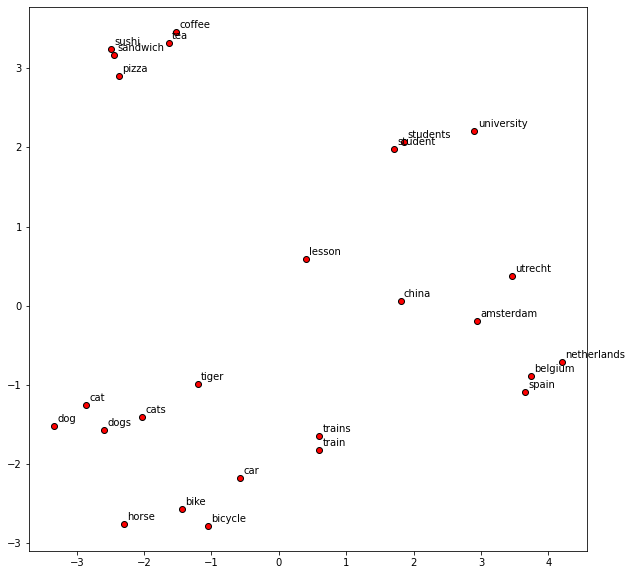

In [23]:
display_scatterplot(wv,
                        ['dog', 'cat', 'dogs', 'cats', 'horse', 'tiger',
                         'university', 'lesson', 'student', 'students',
                         'netherlands', 'amsterdam', 'utrecht', 'belgium', 'spain', 'china',
                         'coffee', 'tea', 'pizza', 'sushi', 'sandwich',
                         'car', 'train', 'bike', 'bicycle', 'trains'])


**Question**: What do you notice in this plot? Do the distances between the words make sense? Any surprises? Feel free to add your own words!

# Biases

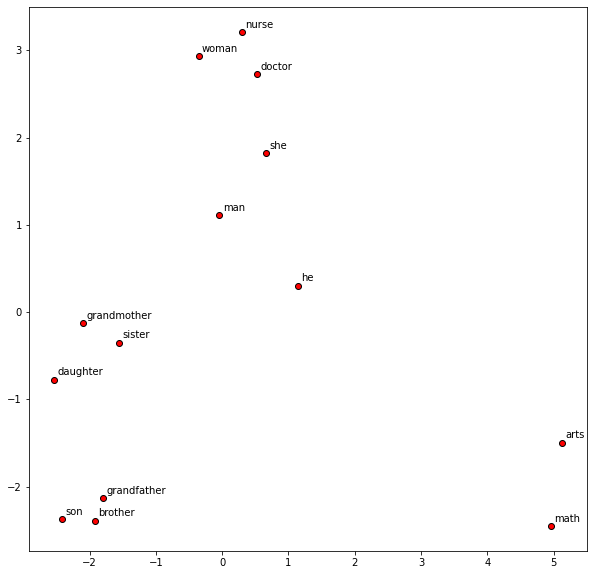

In [24]:
display_scatterplot(wv,
                        ['he', 'she', 'sister',
                         'brother', 'man', 'woman',
                         'nurse', 'doctor',
                         'grandfather', 'grandmother',
                         'math', 'arts',
                         'daughter', 'son'])

In [25]:
def calc_avg_similiarity(wv, attribute_words, target_word):
    score = 0

    for attribute_word in attribute_words:
            score += wv.similarity(attribute_word, target_word)

    return score/len(attribute_words)

In [26]:
# set of attribute words
attribute_words_m = ['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']
attribute_words_f = ['female', 'woman', 'girl', 'sister', 'she',
                     'her', 'hers', 'daughter']

Is *math* more associated with male or female words?

Compute the average cosine similarity between the target word
and the set of attribute words.

In [27]:
print("Avg. similarity with male words: %.3f" %
      calc_avg_similiarity(wv, attribute_words_m, 'math'))
print("Avg. similarity with female words: %.3f" %
      calc_avg_similiarity(wv, attribute_words_f, 'math'))

Avg. similarity with male words: 0.118
Avg. similarity with female words: 0.105


What about *poetry*?

In [28]:
print("Avg. similarity with male words: %.3f" %
      calc_avg_similiarity(wv, attribute_words_m, 'poetry'))
print("Avg. similarity with female words: %.3f" %
      calc_avg_similiarity(wv, attribute_words_f, 'poetry'))

Avg. similarity with male words: 0.166
Avg. similarity with female words: 0.185


#Next

Repeat this analysis but now with the GloVe model trained on Twitter data,
e.g. `glove-twitter-50`.

* Which model obtains better performance on the word similarity task? (WordSim353?)
* What other differences do you observe? (e.g. think of the vocabulary, biases, etc.)

# FastText

(only if you have time, this can take a while (11 min?))

Load in a fastText model

In [29]:
wv_f = api.load('fasttext-wiki-news-subwords-300')

Usage is very similar to before. For example, we can calulcate the similarity
between two words

In [30]:
print(wv_f.similarity("dog", "dogs"))

0.8457405


**Question** How does this compare to the similarity scores you obtained
with the other models you tried?